# 데이터 조작 연습문제

#### 1. 필요 패키지 임포트하시오.

In [1]:
import pandas as pd
import numpy as np

#### 2. seaborn에서 제공하는 타이타닉 데이터세트를 로딩하여 데이터프레임 titanic을 생성하시오.

- 타이타닉 데이터셋 로딩

In [2]:
# 타이타닉 승객 dataset 읽어오기
import seaborn as sns 
titanic = sns.load_titanic = sns.load_dataset('titanic')

#### 3. 타이타닉 데이터의 전반적인 구조와 내용을 파악하시오.

#### 1) 데이터의 앞부분 출력

In [3]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### 2) 데이터의 크기 확인

In [6]:
titanic.shape

(891, 15)

#### 3) 데이터의 변수별 속성 확인

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 4) 데이터의 요약통계량 출력

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 5) 데이터의 변수(컬럼)명 출력

In [9]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#### 6) 타이타닉 승객의 생존자와 사망자 인원수 출력

In [12]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

#### 7) age의 분포를 히스토그램으로 그리기

<Axes: ylabel='Frequency'>

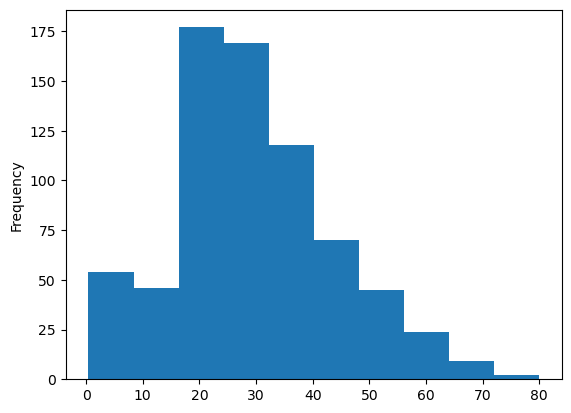

In [13]:
titanic.age.plot.hist()

#### 4. 타이타닉 승객의 나이(age)를 다음 조건에 따라 범주형 데이터(age_cat)로 생성하고 titanic 데이터프레임에 추가하시오.

- bins=[0, 15, 25, 35, 60, 99]
- labels=['미성년자','청년','중년','장년','노년']

**1) 데이터 범위 설정**

In [14]:
bins=[0, 15, 25, 35, 60, 99]
labels=['미성년자','청년','중년','장년','노년']

**2) 범주형 데이터 생성**

In [21]:
# 카테고리 데이터 생성
age_cat = pd.cut(titanic.age, bins=bins, labels=labels)
titanic['age_cat'] = age_cat

**3) 범주형 데이터 확인**

In [22]:
#카테고리 데이터 확인
titanic['age_cat']

0       청년
1       장년
2       중년
3       중년
4       중년
      ... 
886     중년
887     청년
888    NaN
889     중년
890     중년
Name: age_cat, Length: 891, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

#### 5. 타이타닉 데이터를 사망자/생존자 그룹으로 나누고(alive), 각 그룹에 대해 미성년자, 청년, 중년, 장년, 노년 승객의 비율을 구하시오.

- 각 그룹별 비율의 전체 합은 1이 되어야 한다.

**1) 데이터 셋 분리 : 생존자 그룹과 사망자 그룹**

In [27]:
# 사망자 그룹 데이터프레임 추출
die = titanic[titanic.survived == 0]
die.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN


In [28]:
# 생존자 그룹 데이터프레임 추출
alive = titanic[titanic.survived == 1]
alive.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년


**2) 그룹별 범주형 데이터 빈도 계산**

- 사망자 그룹의 연령대별 빈도

In [35]:
die.age_cat.value_counts()

age_cat
청년      143
장년      117
중년      113
미성년자     34
노년       17
Name: count, dtype: int64

- 생존자 그룹의 연령대별 빈도

In [36]:
alive.age_cat.value_counts()

age_cat
중년      83
장년      78
청년      75
미성년자    49
노년       5
Name: count, dtype: int64

------------------------